
<h1>Video Games Sales Data</h1>
<p>This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.</p>
<p>Data contains the information only up to 2017.</p>

<p>Fields include</p>
<ul>
<li>Rank - Ranking of overall sales</li>
<li>Name - The games name</li>
<li>Platform - Platform of the games release</li>
<li>Year - Year of the game's release</li>
<li>Genre - Genre of the game</li>
<li>Publisher - Publisher of the game</li>
<li>NA_Sales - Sales in North America (in millions)</li>
<li>EU_Sales - Sales in Europe (in millions)</li>
<li>JP_Sales - Sales in Japan (in millions)</li>
<li>Other_Sales - Sales in the rest of the world (in millions)</li>
<li>Global_Sales - Total worldwide sales</li>
</ul>


In [208]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#Set path
base_directory = 'C:/Users/Zaneta/Desktop/PYPROJECTS/'
file_name = 'vgsales.csv'
full_file_path = base_directory + file_name
dt = pd.read_csv(full_file_path)
dt.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Highest total global sales:
  Platform  Global_Sales
0     X360        969.60
1      PS3        949.35
2      Wii        909.81
  Platform  Global_Sales
0      PS3        949.35
1      Wii        909.81
2     X360        969.60


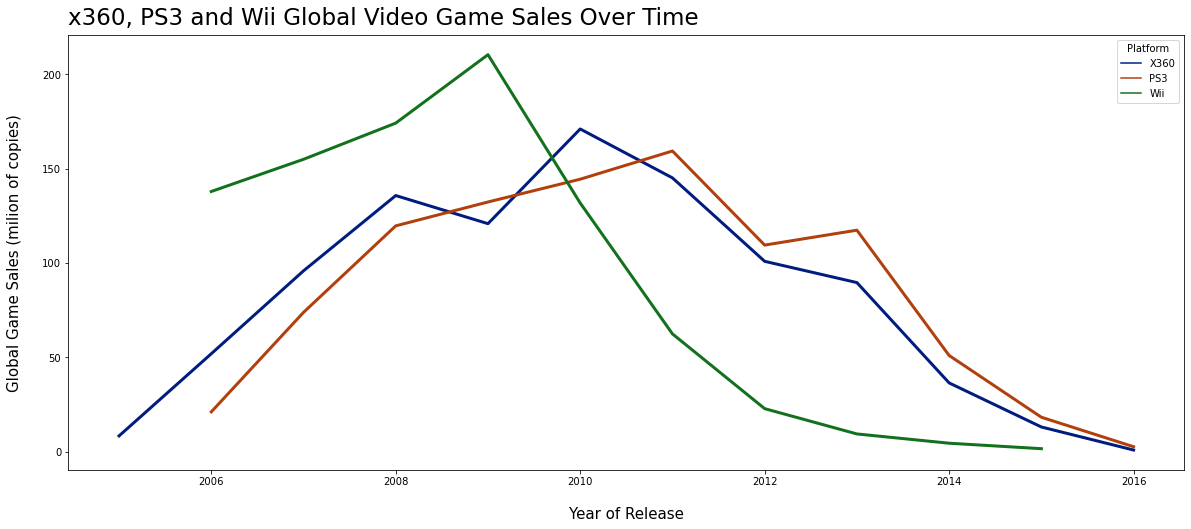

In [356]:
# Explore data and clean from null values
data = dt.dropna()

# Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
seventh_gens = ["X360", "PS3", "Wii"]
data_7thgens = data[data["Platform"].isin(seventh_gens)]
data_sales = data_7thgens.groupby(["Year","Platform"])["Global_Sales"].sum().reset_index()
highest_sales = data_7thgens.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).reset_index()
s = data_7thgens.groupby("Platform")["Global_Sales"].sum().reset_index()
print(f"Highest total global sales:\n{highest_sales}")
print(s)
#Plotting Xbox 360, Playstation 3, and Nintendo Wii global sales over years


figsize = [20, 8]
plt.figure(figsize=figsize)
sns.lineplot(
    data=data_sales, 
    x = "Year",
    y = "Global_Sales", 
    hue='Platform',
    palette='dark',
    linewidth = "3"
            )
plt.title("x360, PS3 and Wii Global Video Game Sales Over Time", size = 23, loc = "left", pad = 10)
plt.xlabel("Year of Release", size = 15, labelpad = 20)
plt.ylabel("Global Game Sales (milion of copies)", size = 15, labelpad = 20)


plt.show()


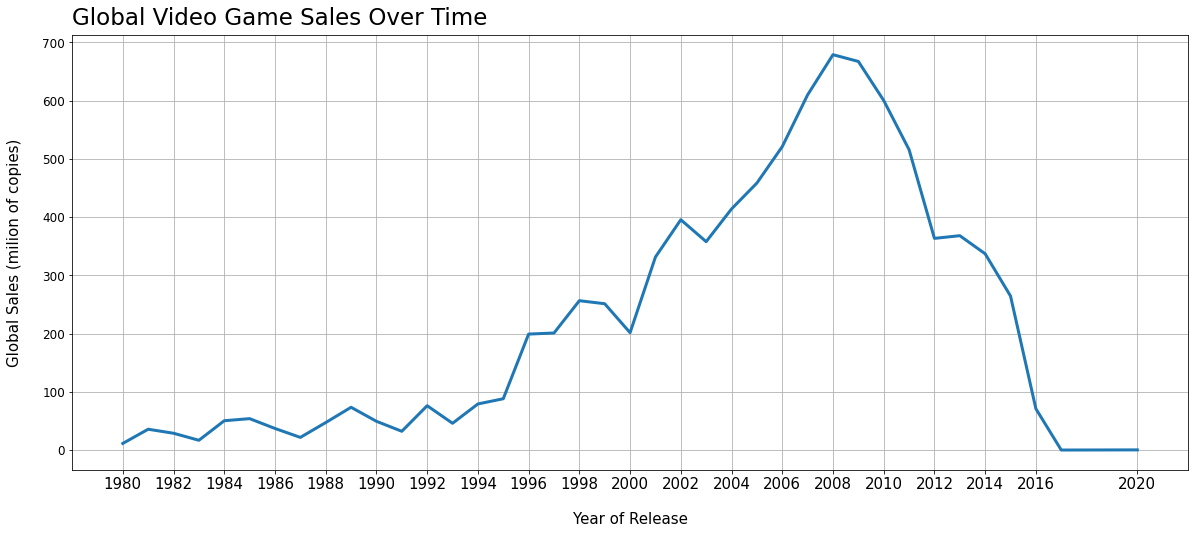

In [224]:
#Global sales of video games through years

globalsales_years = data.groupby('Year').sum().reset_index(drop=False)
figsize = [20, 8]
x=globalsales_years["Year"]
y=globalsales_years["Global_Sales"]
width = 0.8

plt.figure(figsize=figsize)
lineplot = plt.plot(x, y, linewidth = "3")
plt.grid()
plt.title("Global Video Game Sales Over Time", size = 23, loc = "left", pad = 10)
plt.xlabel("Year of Release", size = 15, labelpad = 20)
plt.ylabel("Global Sales (milion of copies)", size = 15, labelpad = 20)
plt.yticks(size = 12)
plt.xticks(globalsales_years['Year'][globalsales_years['Year'].index % 2 == 0], size = 15)
plt.show()

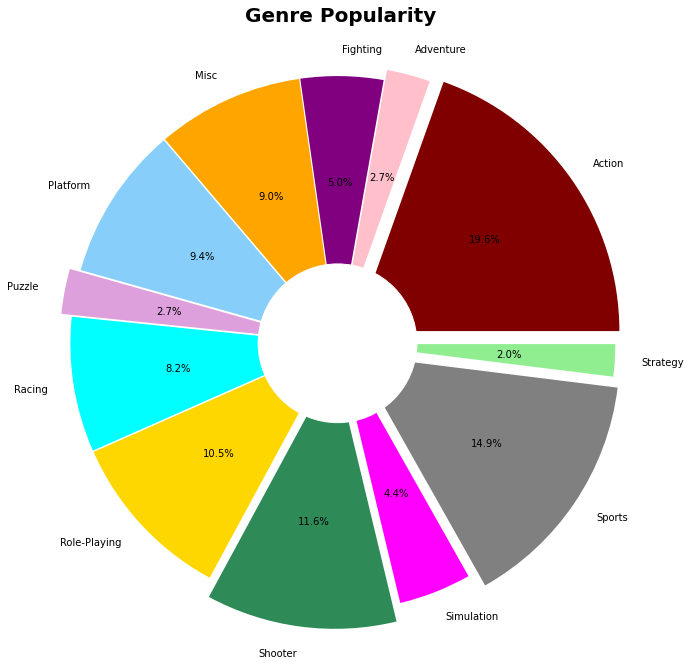

In [423]:
#Global sales for games genre, genre popularity
df_genre = data.groupby("Genre").sum().reset_index()

x = [i for i in df_genre["Global_Sales"]]
labels = [i for i in df_genre["Genre"]]

colors= [
    'maroon', 'pink','purple', 'orange','lightskyblue','plum','cyan','gold','seagreen','magenta','grey','lightgreen','lightcoral','lightblue'
]
explode = [0.08 if df_genre["Genre"][i] in ['Action', 'Sports', 'Shooter'] else
           0.05 if df_genre["Genre"][i] in ["Puzzle", "Strategy", "Adventure"] else
           0.01 for i in range(len(df_genre["Genre"]))]
# Create pie chart
plt.figure(figsize=(11, 11))
plt.pie(
    x,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    explode=explode,
    textprops = {"fontsize": 10}
)
plt.title('Genre Popularity', fontdict={'fontweight':'bold', 'fontsize':20}, pad = 30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Make a hole in the middle
my_circle = plt.Circle((0,0), 0.30, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the plot
plt.show()

In [456]:
# Grouping sales by platform
platform = data[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]]
platform = platform.groupby("Platform").sum().sort_values("Global_Sales", ascending=False).reset_index(drop=False).head(10)
platform.style.set_properties(subset=["Global_Sales"], **{"background-color": "lightyellow"})  


,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,PS2,572.920000,332.630000,137.540000,1233.460000
1,X360,594.330000,278.000000,12.300000,969.600000
2,PS3,388.900000,340.470000,79.210000,949.350000
3,Wii,497.370000,264.350000,68.280000,909.810000
4,DS,388.530000,194.050000,175.020000,818.910000
5,PS,334.710000,212.380000,139.780000,727.390000
6,GBA,178.430000,72.490000,46.560000,305.620000
7,PSP,107.090000,67.160000,75.890000,291.710000
8,PS4,96.800000,123.700000,14.300000,278.100000
9,PC,92.040000,137.350000,0.170000,254.700000


In [455]:
# Grouping sales by publisher
publishers = data[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]]
publishers = publishers.groupby("Publisher").sum().sort_values("Global_Sales", ascending=False).reset_index(drop=False).head(10)
publishers.style.set_properties(subset=["Global_Sales"], **{"background-color": "lightyellow"})    # Highlight a column

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,815.750000,418.300000,454.990000,1784.430000
1,Electronic Arts,584.220000,367.380000,13.980000,1093.390000
2,Activision,426.010000,213.720000,6.540000,721.410000
3,Sony Computer Entertainment,265.220000,187.550000,74.100000,607.280000
4,Ubisoft,252.810000,163.030000,7.330000,473.540000
5,Take-Two Interactive,220.470000,117.950000,5.830000,399.300000
6,THQ,208.600000,94.600000,5.010000,340.440000
7,Konami Digital Entertainment,88.910000,68.620000,90.930000,278.560000
8,Sega,108.780000,81.410000,56.190000,270.700000
9,Namco Bandai Games,69.380000,42.610000,126.840000,253.650000


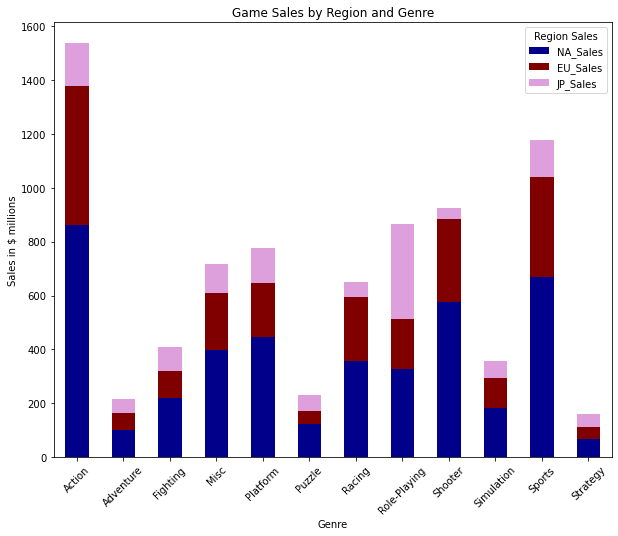

In [511]:
# Group by 'Genre' and sum up sales for each region
genre_sales = data.groupby("Genre").sum()
fig, ax = plt.subplots(figsize=(10, 8))
# Create a stacked bar chart
ax = genre_sales[["NA_Sales", "EU_Sales", "JP_Sales"]].plot(kind="bar", stacked=True, 
                                                            color=["darkblue", "maroon", "plum"], ax = ax)
ax.set_xlabel("Genre")
ax.set_ylabel("Sales in $ millions")
ax.set_title("Game Sales by Region and Genre")
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.legend(title="Region Sales")  # Custom legend title
plt.show()

<h1>Summary of Video Game Sales Analysis</h1>

<p>In this project, we conducted an analysis of video game sales data, focusing on global sales trends, genre popularity, and performance across different gaming platforms and regions. Utilizing the vgsales.csv dataset, we cleaned the data to remove any entries with missing values to ensure the accuracy of our analyses.</p>

<p>Key findings include:</p>
<ul>
<li><strong>Console Comparison:</strong> Among the seventh generation consoles, the Xbox 360 led in global sales with a total of 969.60 million units, followed closely by the PlayStation 3 with 949.35 million units, and the Nintendo Wii with 909.81 million units. We visualized these sales over time, revealing peak sales and trends in consumer preferences.</li>
<li><strong>Sales Trends Over Time:</strong> We plotted the overall global sales of video games from the dataset's earliest to its most recent year, identifying significant peaks and troughs that may correlate with economic factors and major game releases.</li>
<li><strong>Genre Popularity:</strong> A detailed analysis of game genres showed that Action, Sports, and Shooter genres are the most popular, accounting for a larger share of the market. We employed a pie chart with an exploded view for these top genres to highlight their dominance.</li>
<li><strong>Platform Performance:</strong> The PlayStation 2 emerged as the top-selling platform in the dataset, with over 1.2 billion units sold globally, underscoring its lasting popularity.</li>
<li><strong>Regional Sales Analysis:</strong> We also explored sales by region for different genres, using a stacked bar chart to compare sales across North America, Europe, and Japan, revealing distinct regional preferences.</li>
</ul>